In [2]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner
from copy import deepcopy
from matplotlib import gridspec
import glob
from tqdm import tqdm
from scipy.stats import dirichlet

sys.path.append('../')
import populations.bbh_models as read_models

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


glasflow is using its own internal version of nflows


In [3]:

chi_b = [0.,0.1,0.2,0.5]
alpha = [0.2,0.5,1.,2.,5.]

NameError: name 'fig_data' is not defined

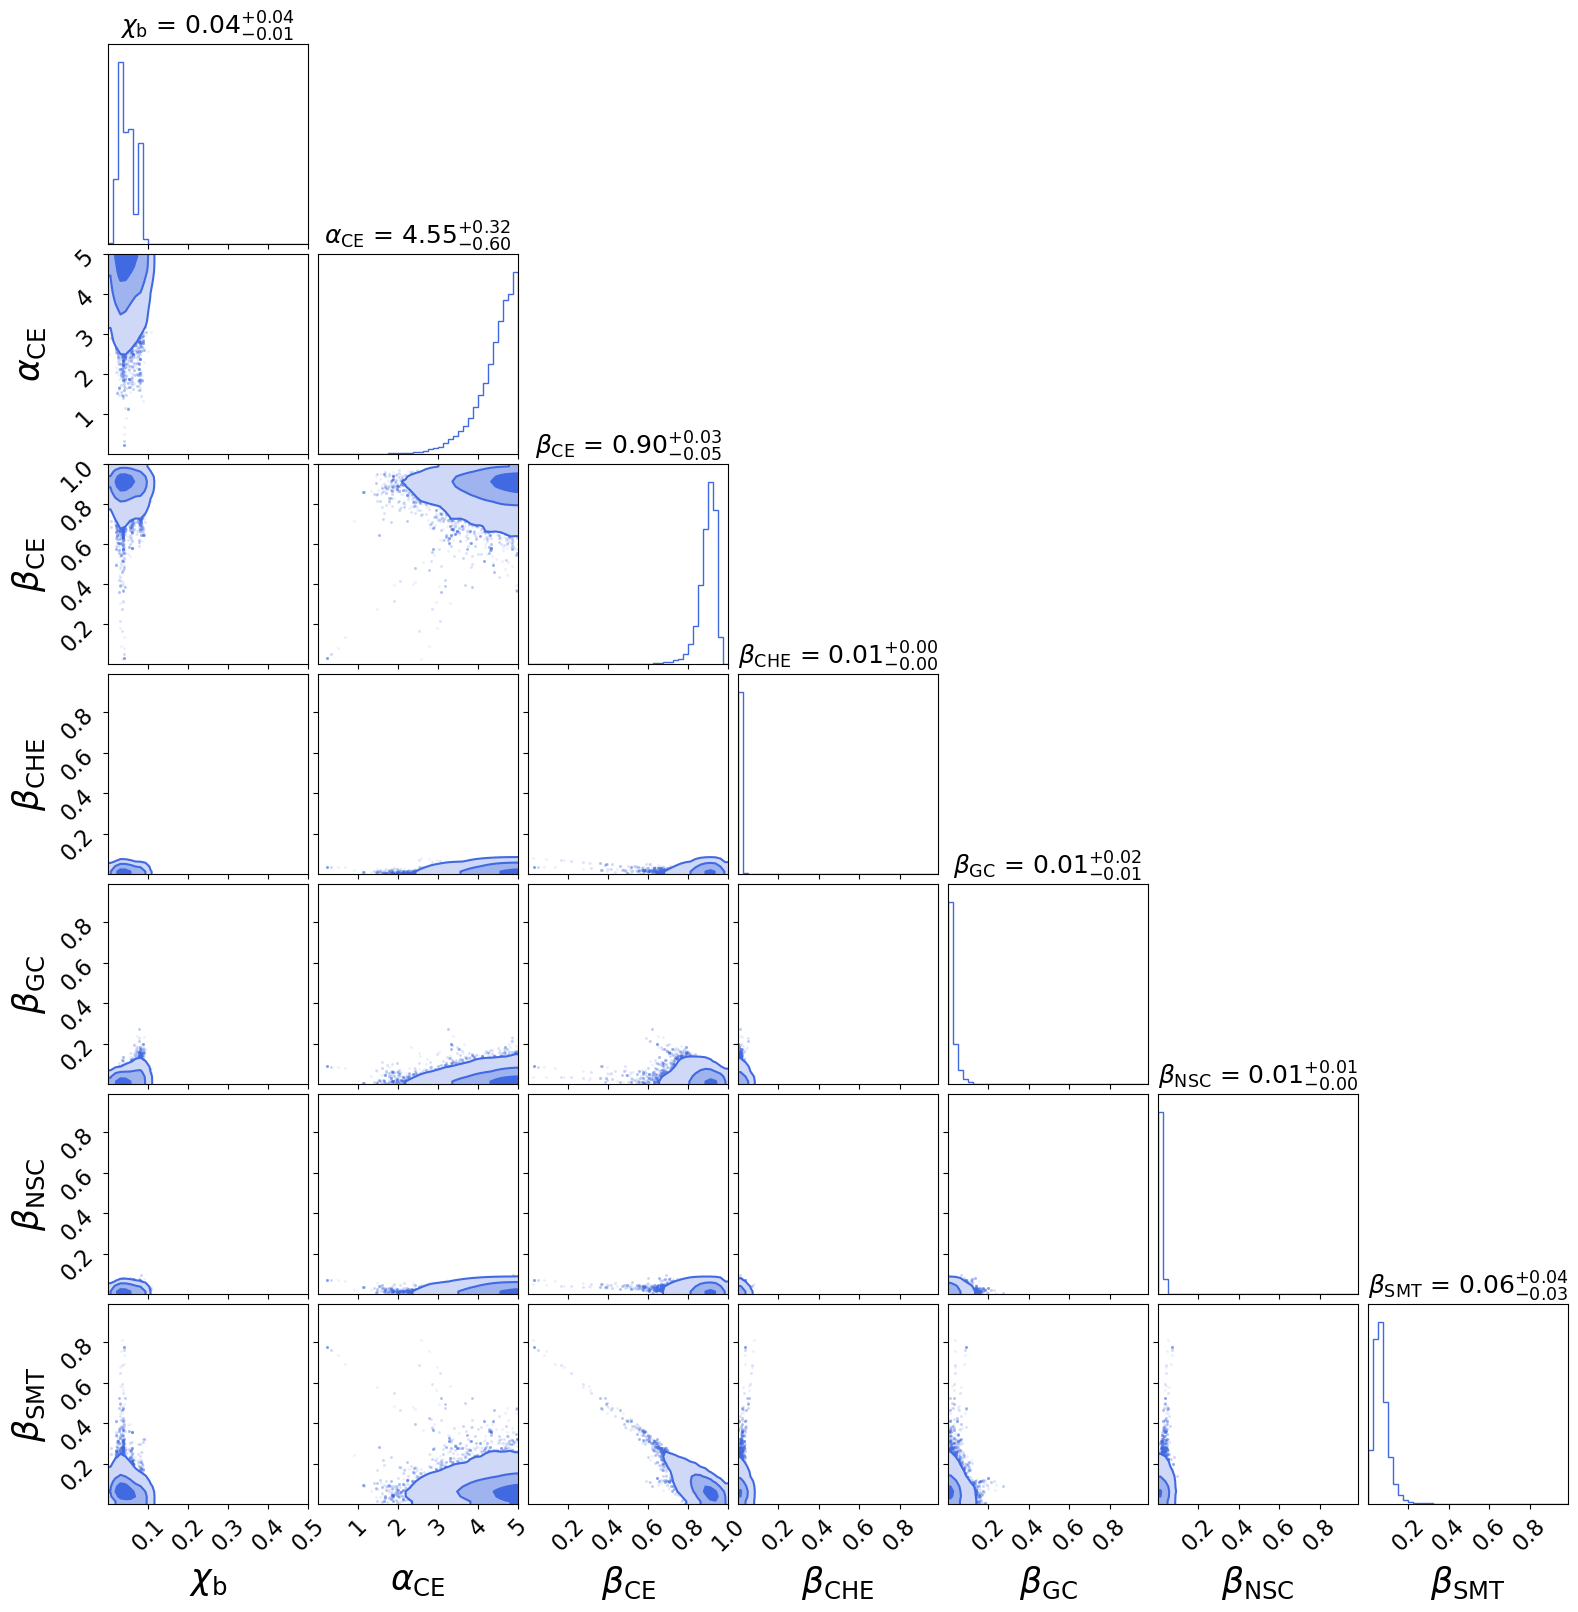

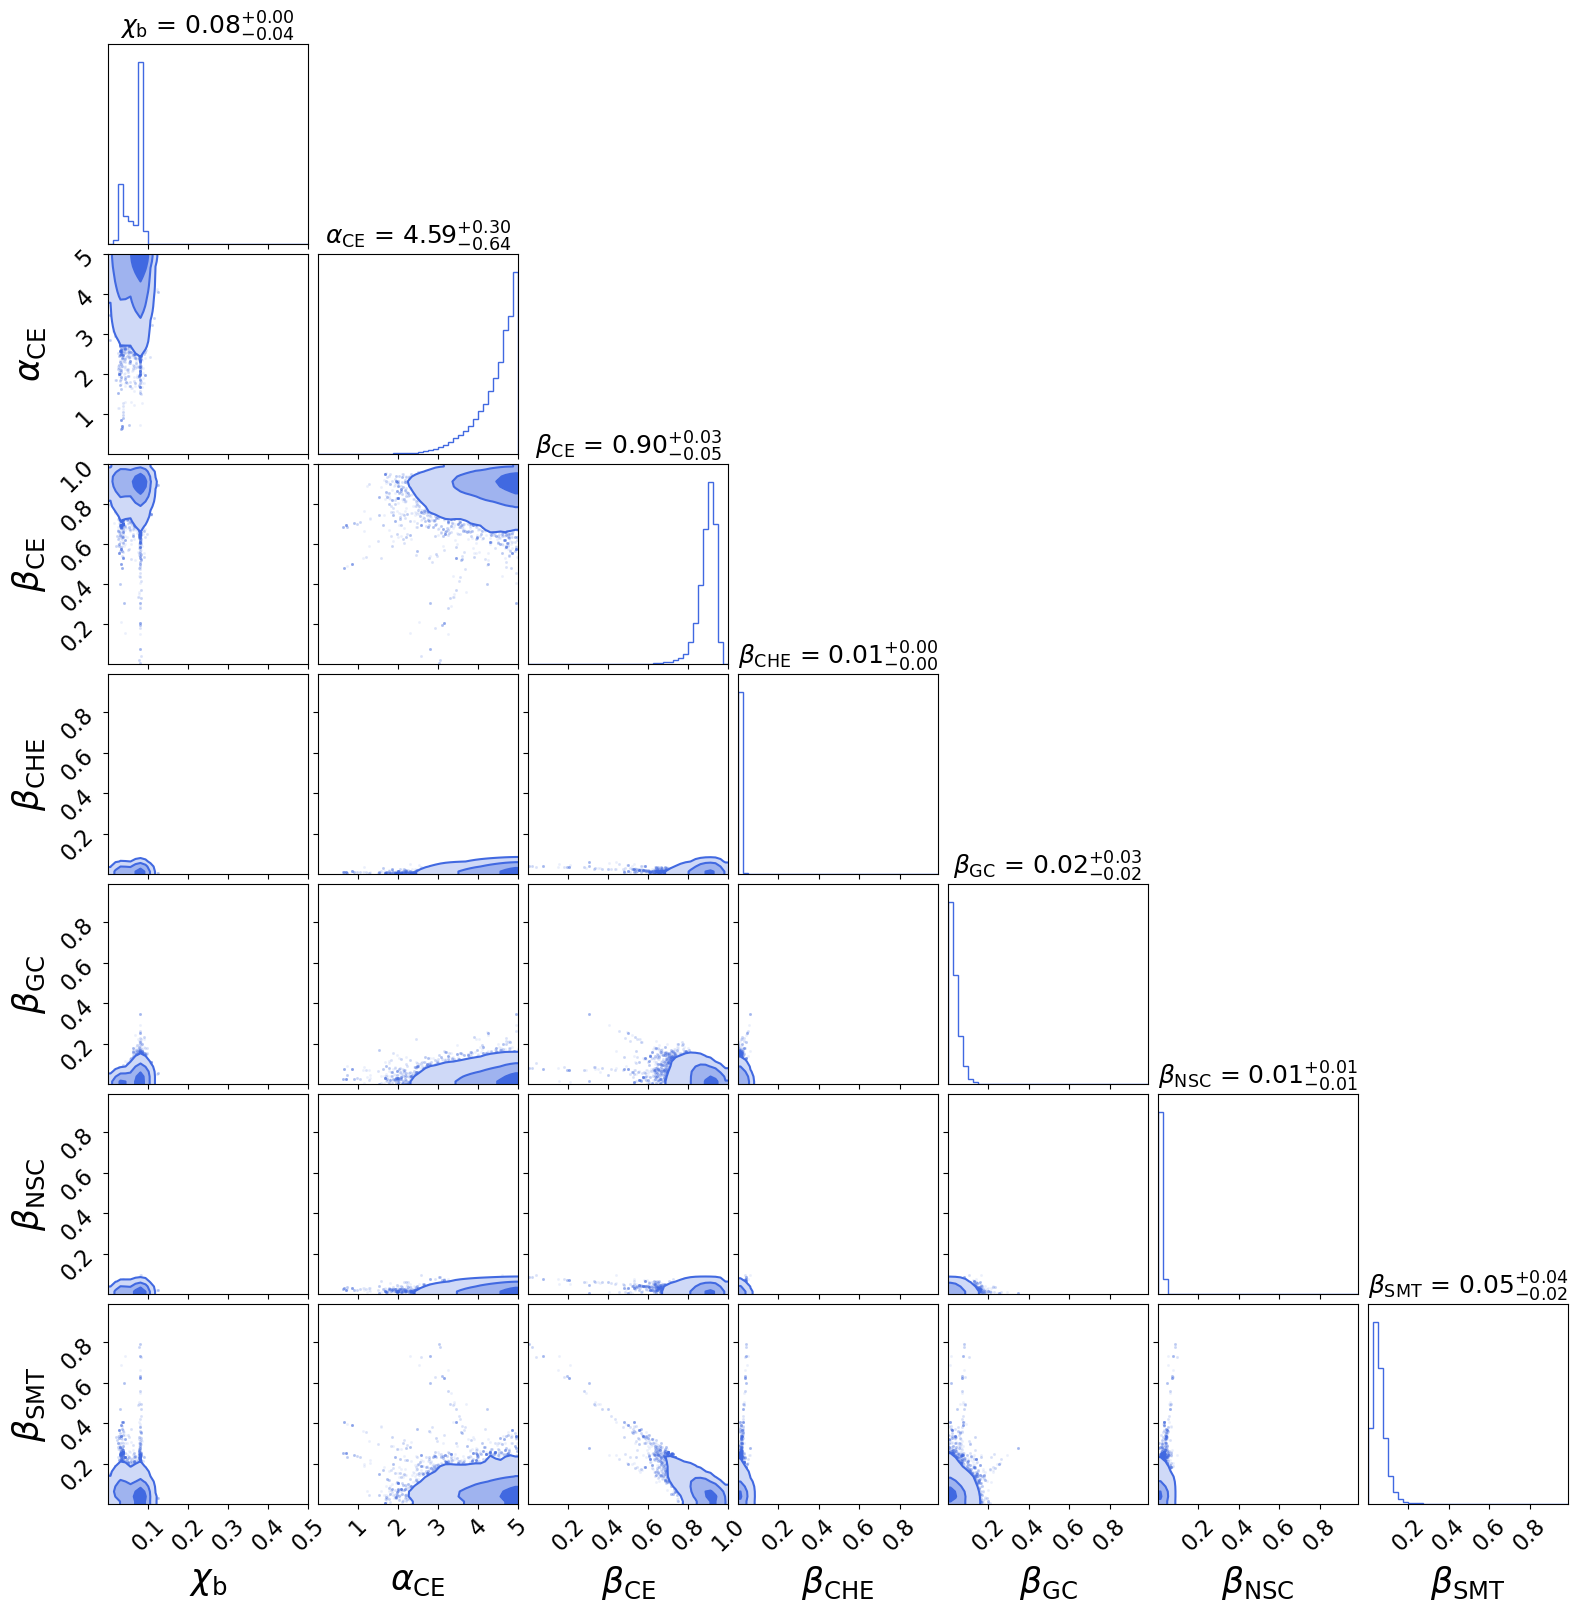

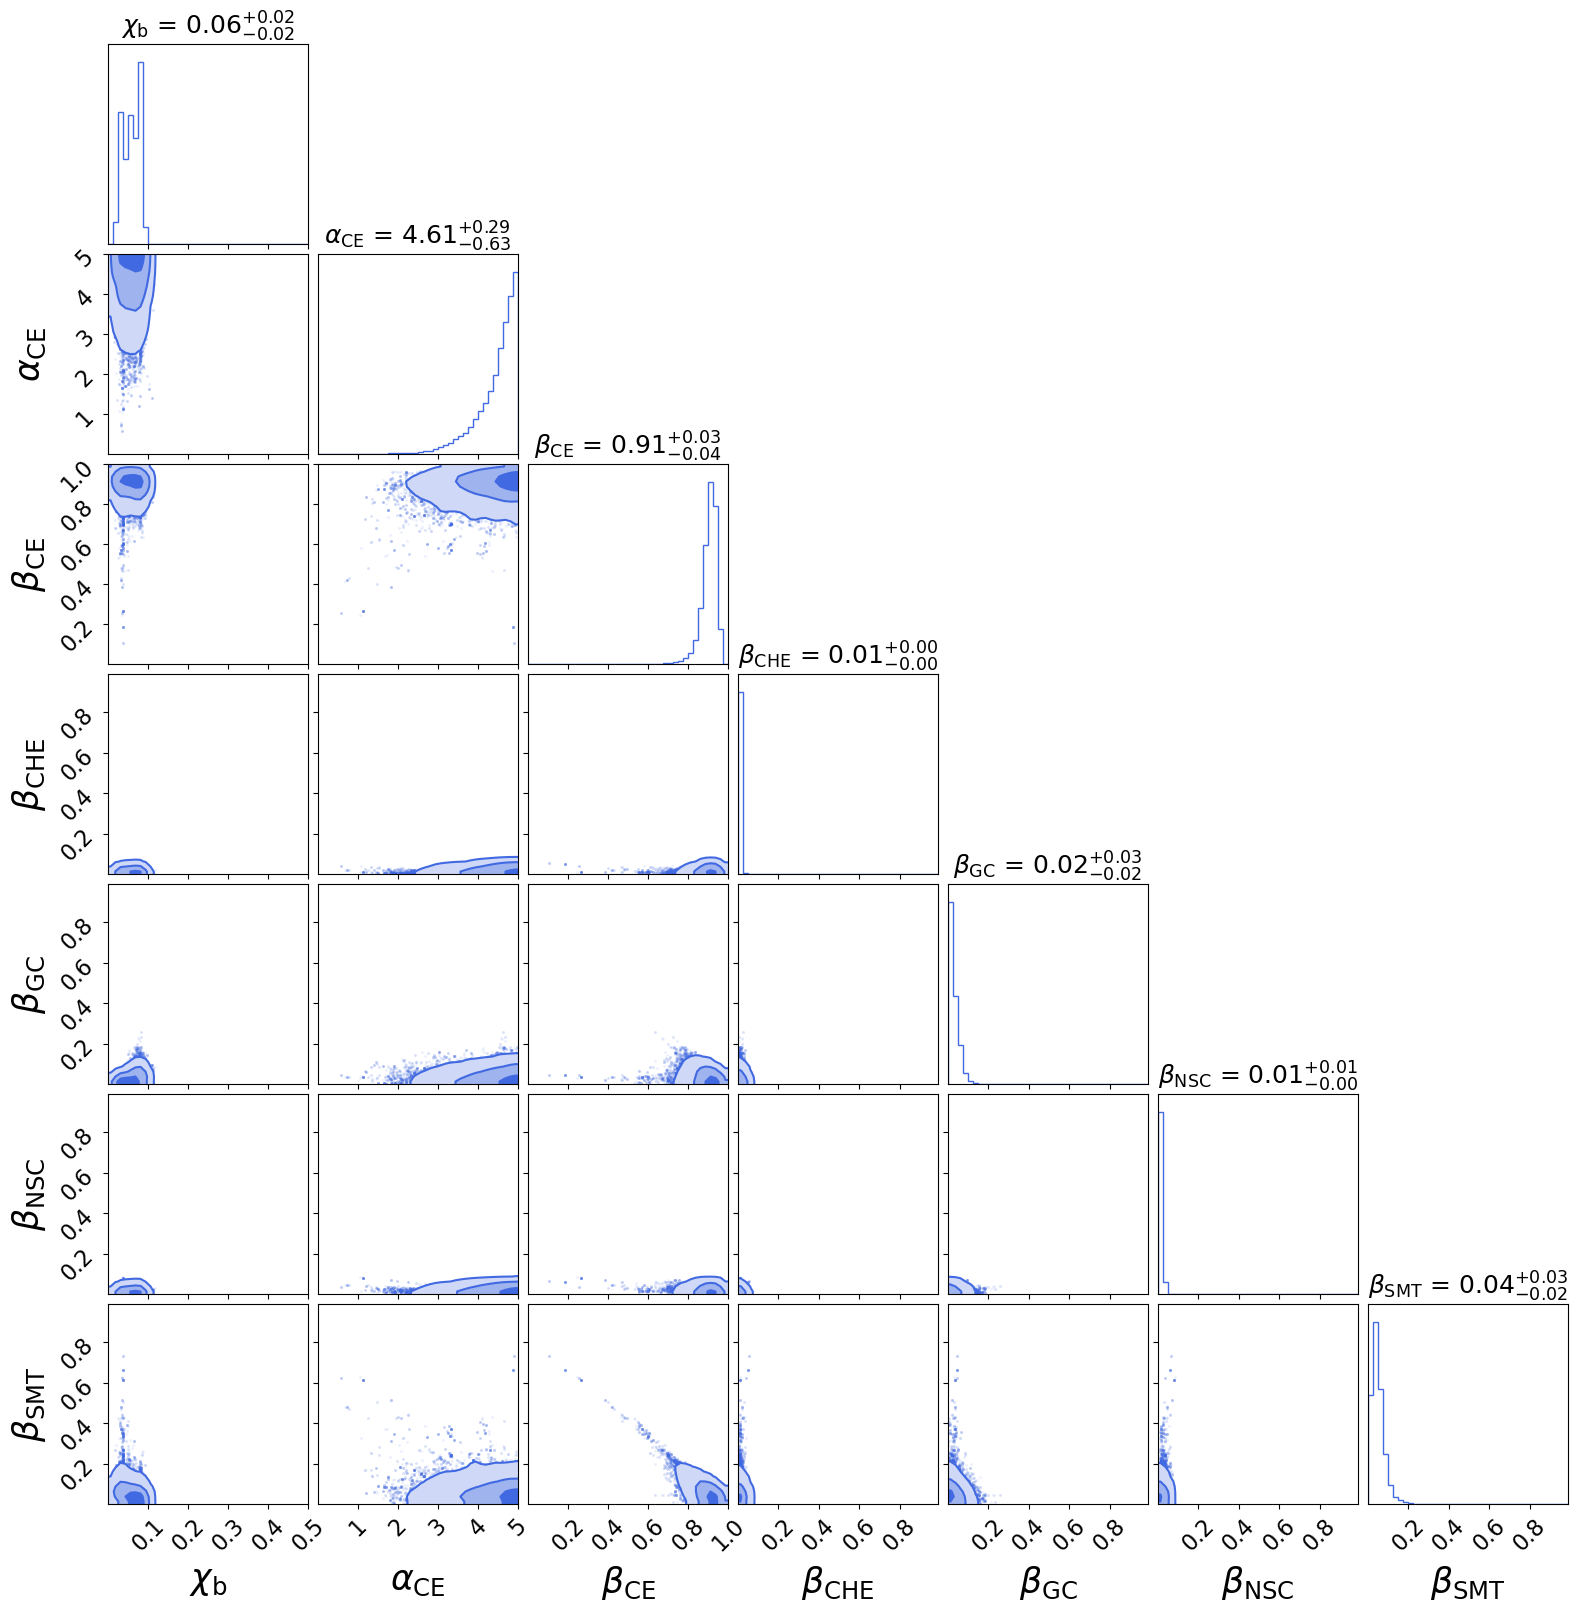

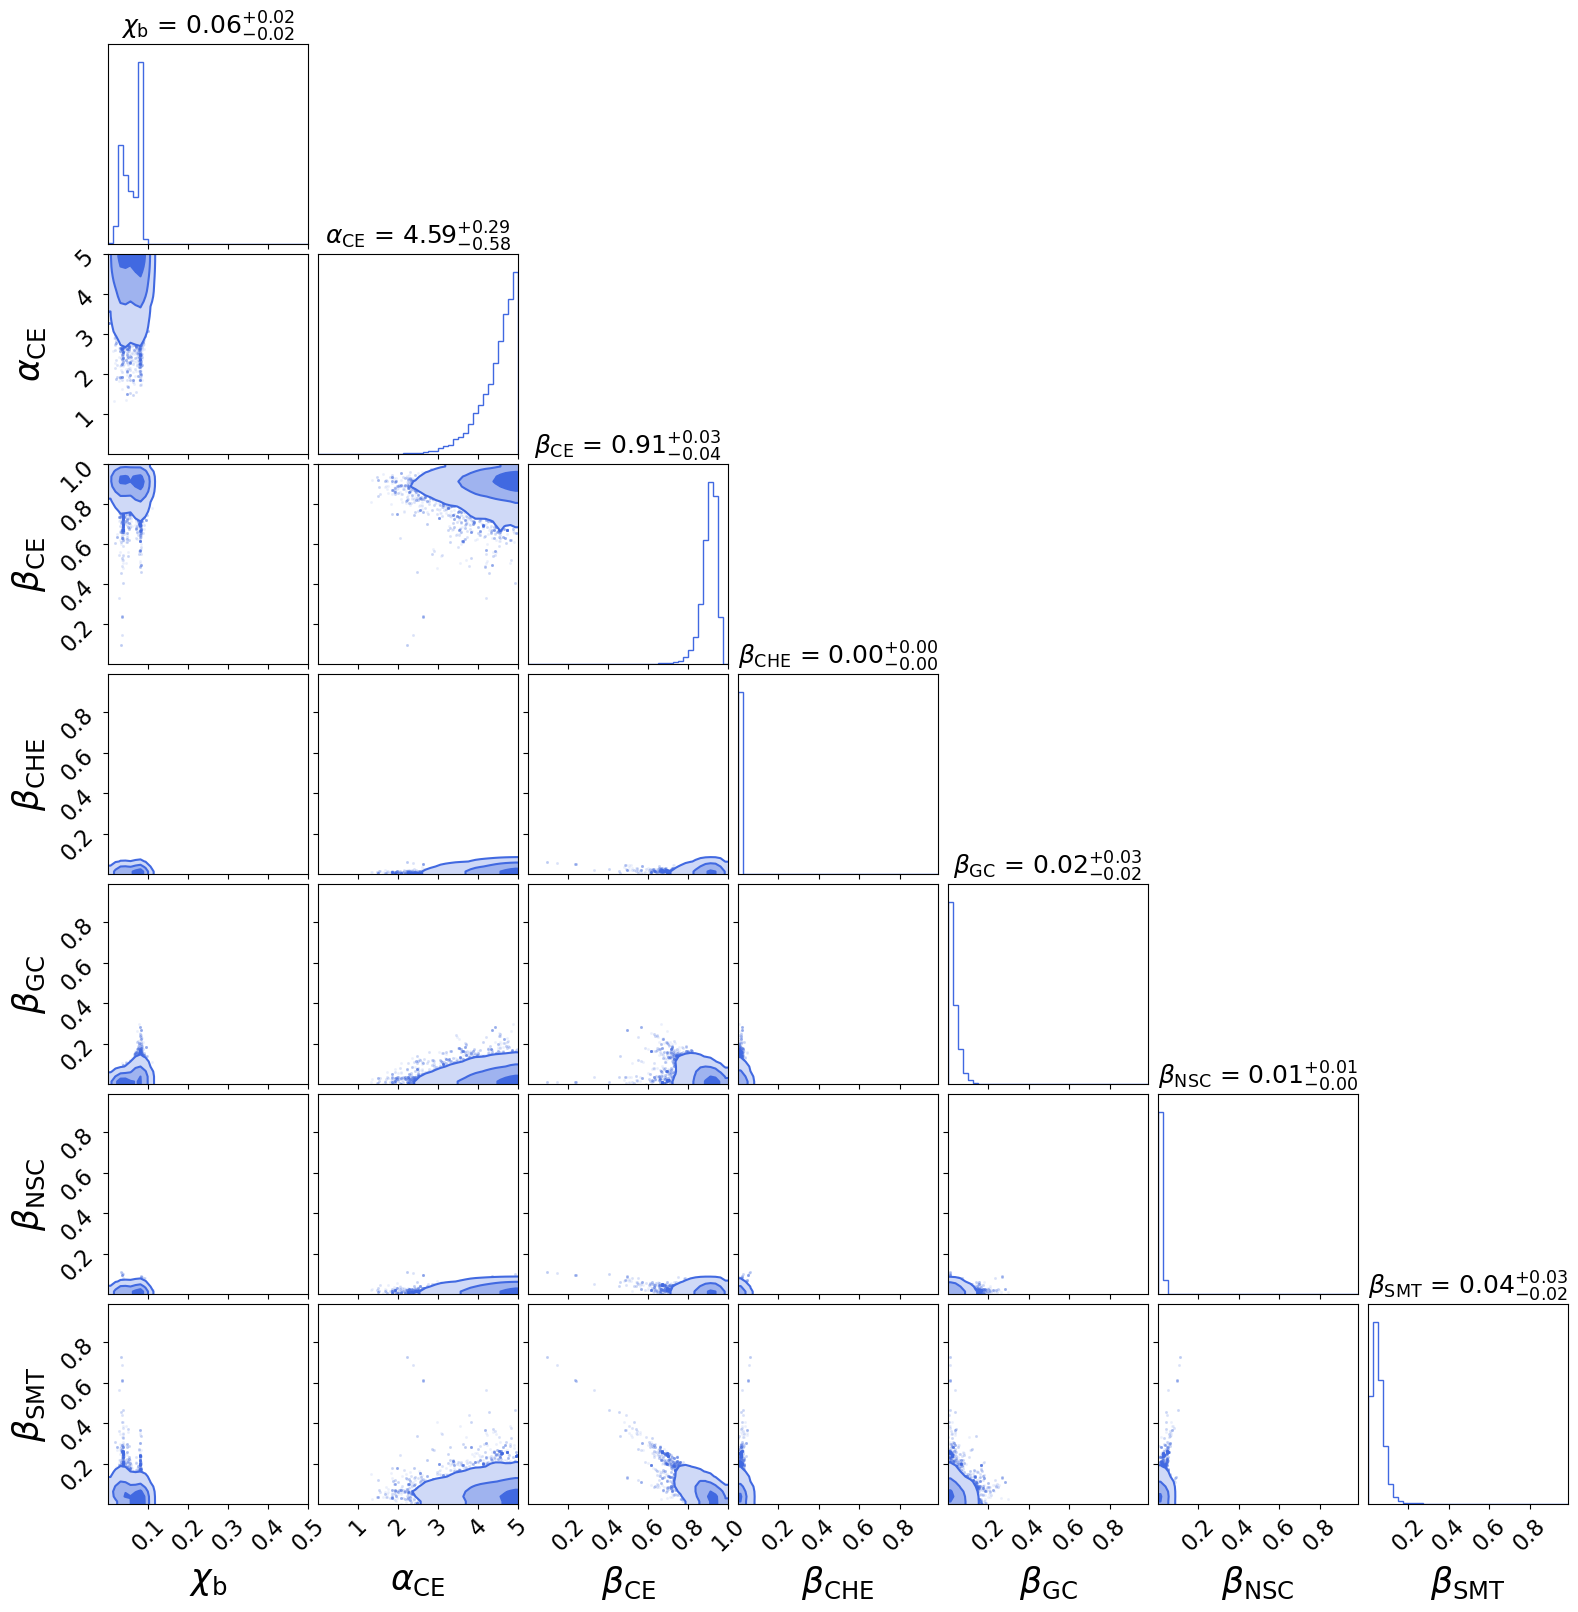

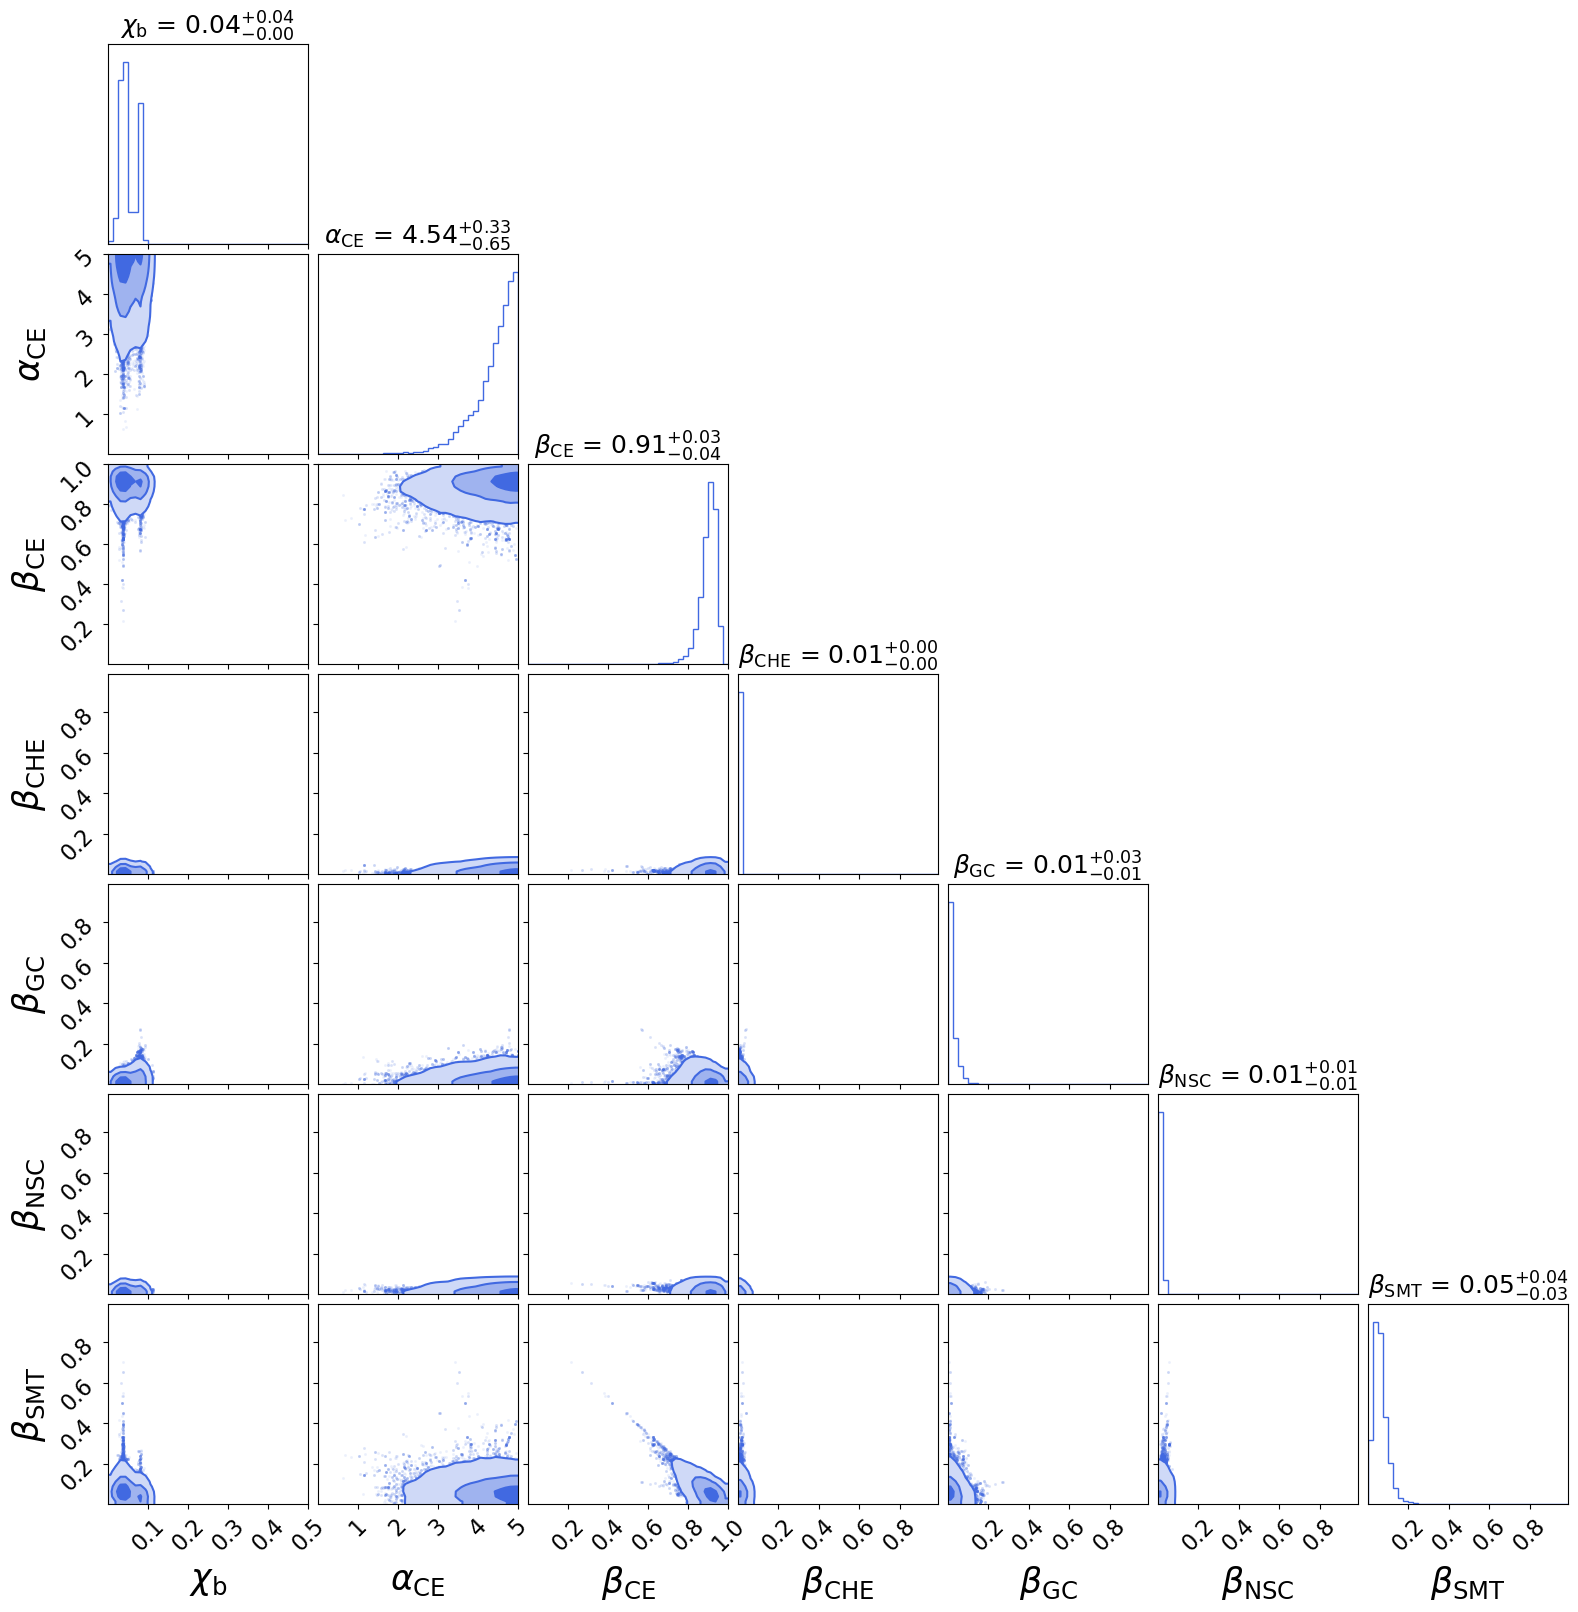

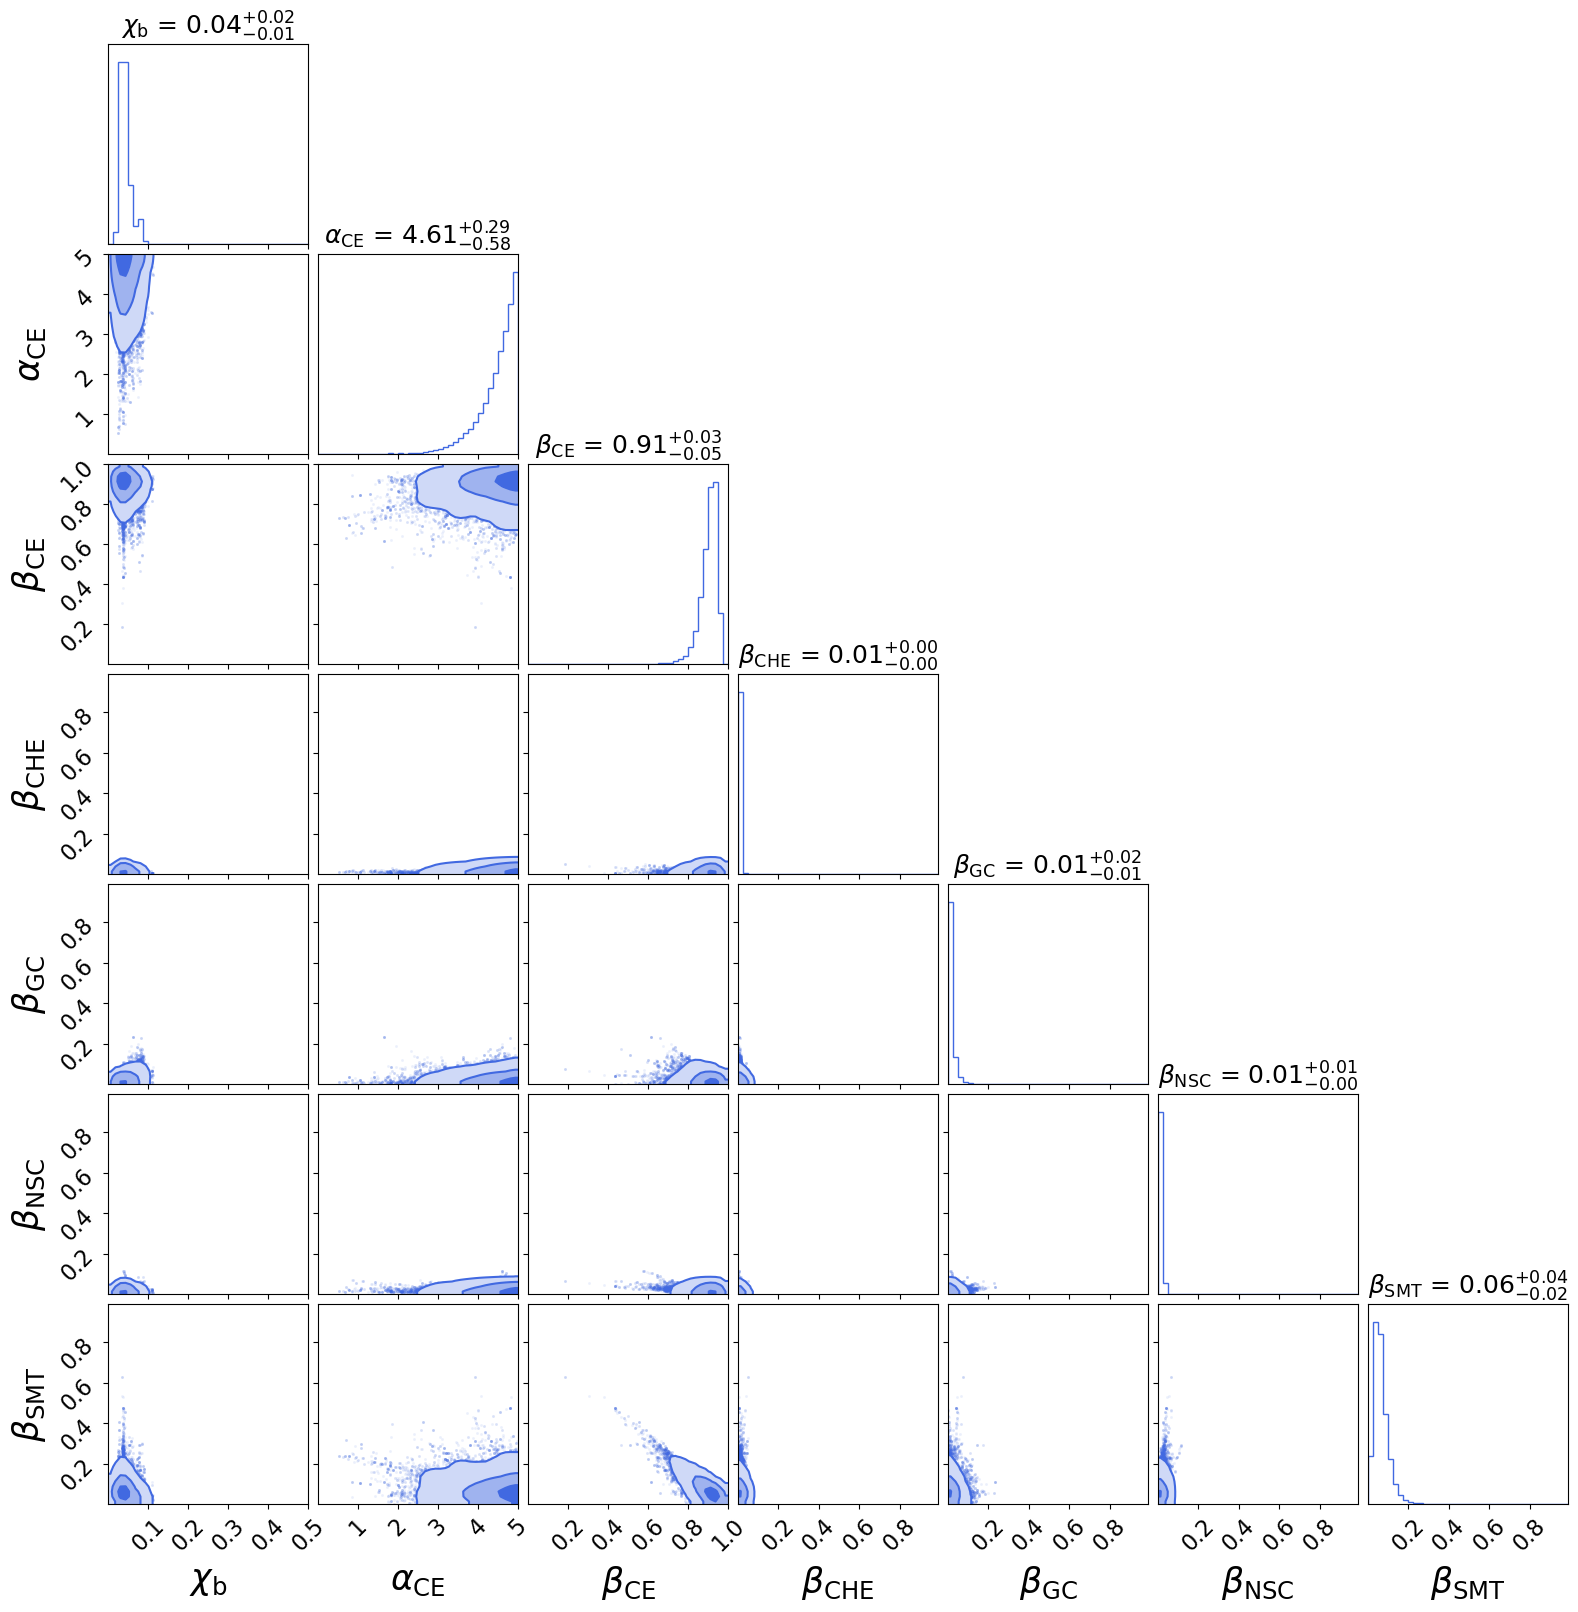

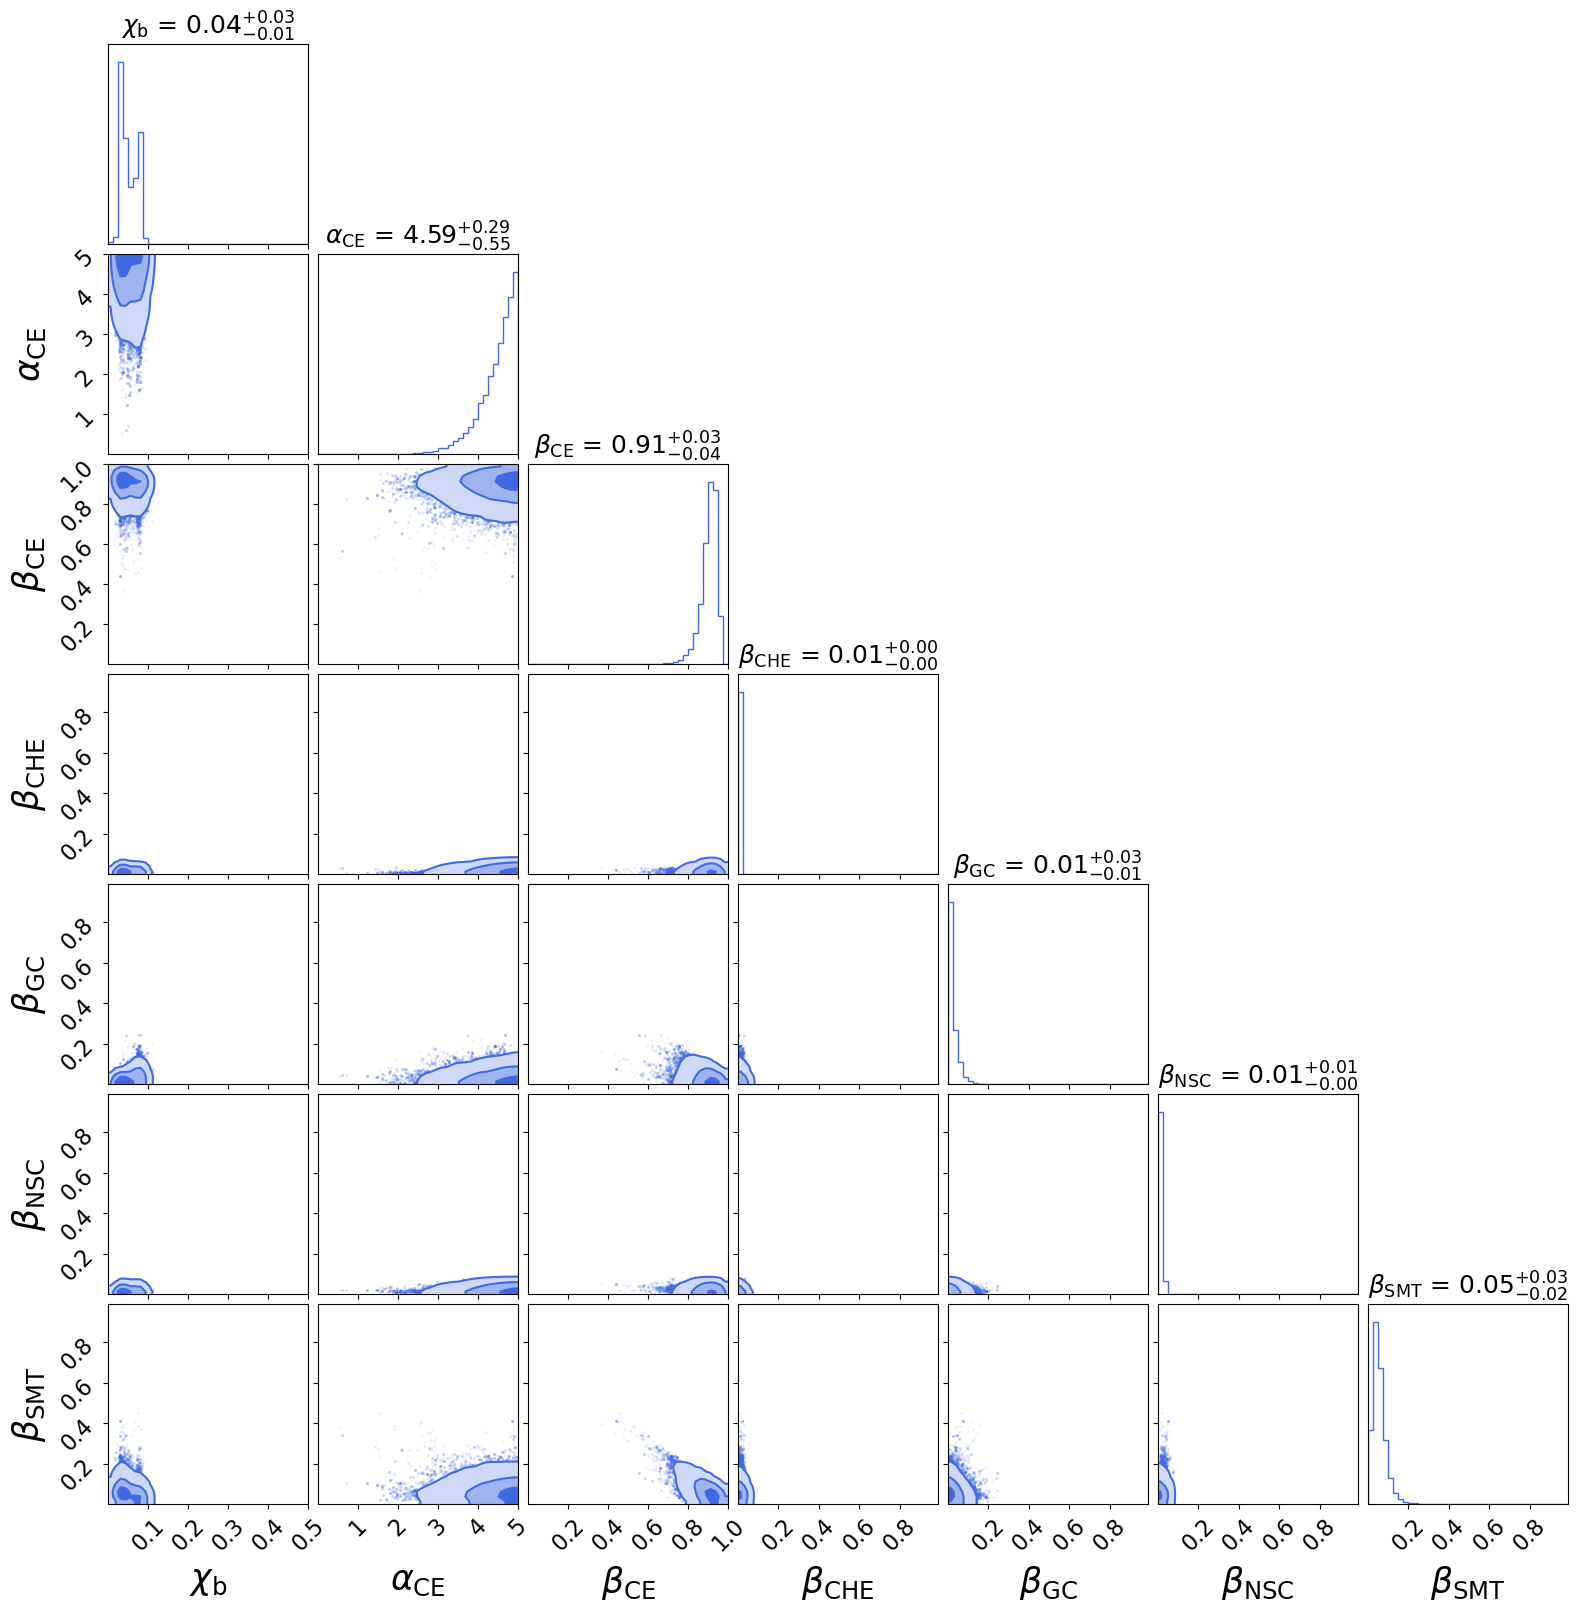

In [6]:
#corner plots of betas
plt.rcParams.update({'font.size': 16})


corner_kwargs = dict(
    bins=40,
    smooth=0.9,
    color="royalblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\chi_\mathrm{b}$', r'$\alpha_\mathrm{CE}$',r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    range = [(0.,.5),(0.,5.),(0.,1.),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)

for result_file in glob.glob('*.hdf5'):
    flow_file = h5py.File(result_file, 'r')
    branching_fracs = np.array(flow_file['model_selection']['samples']['block0_values'])
    corner.corner(branching_fracs, **corner_kwargs)

for a in alpha:
    corner.overplot_lines(fig_data, [None, a, None, None, None, None, None], color='black', alpha=0.5)
#fig_data = corner.corner(dirichlet.pdf(np.ones(5)*0.2, np.ones(5)), fig=fig_data, **corner_kwargs_kde)
#fig_data.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_200324_contcorrectalpha/plots/full_posteriors_corner_cont.pdf')

/var/folders/t1/pzgx3lnj70l28d88_yvswpsr0000gq/T/ipykernel_7833/1946955340.py:26: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  result_samps = np.array(flow_file['model_selection']['samples']['block0_values'])


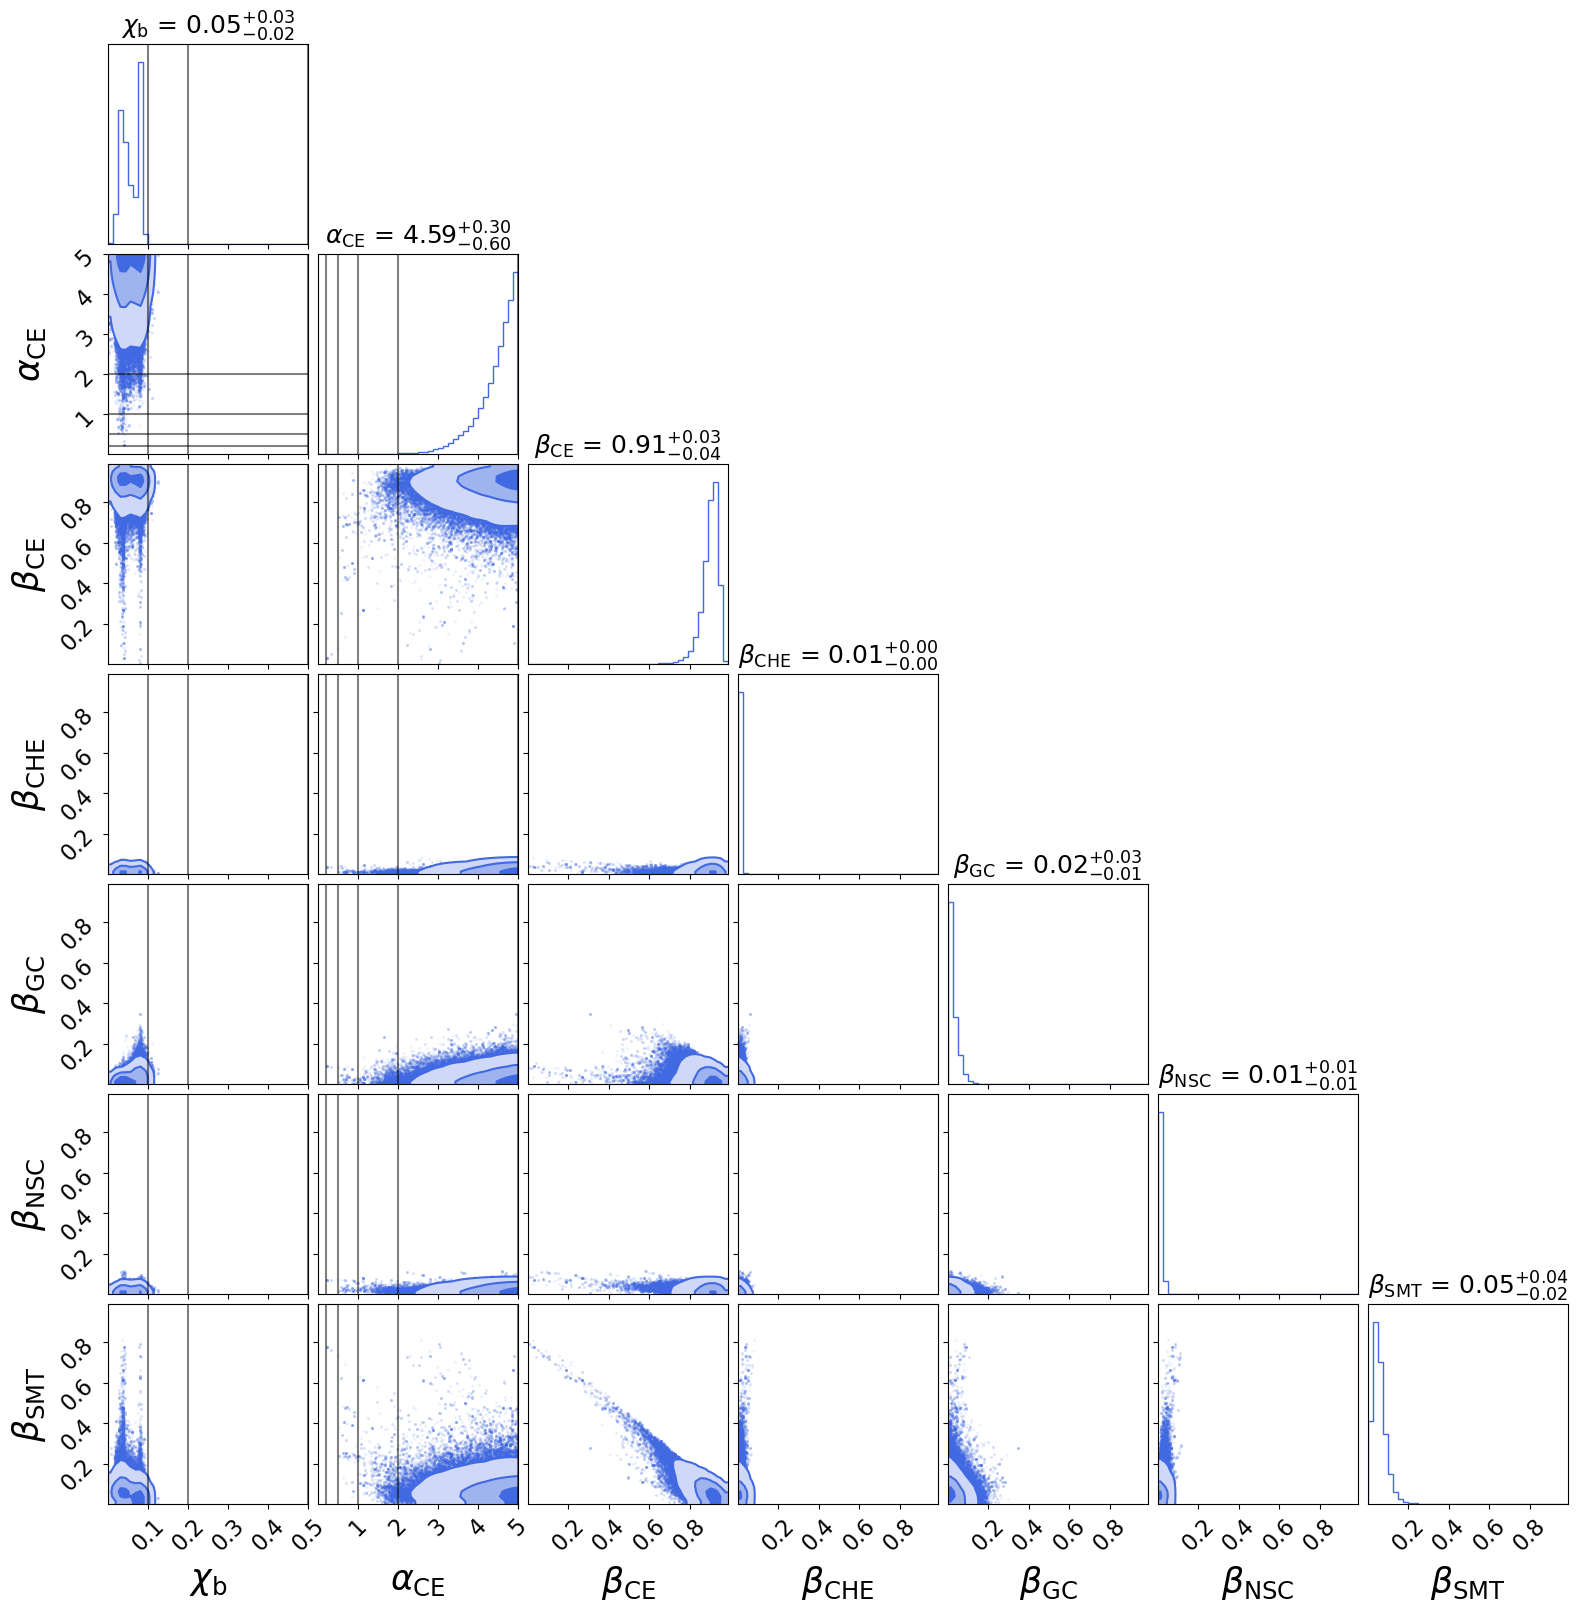

In [4]:
#corner plots of betas
plt.rcParams.update({'font.size': 16})


corner_kwargs = dict(
    bins=40,
    smooth=0.9,
    color="royalblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\chi_\mathrm{b}$', r'$\alpha_\mathrm{CE}$',r'$\beta_{\mathrm{CE}}$',r'$\beta_{\mathrm{CHE}}$',r'$\beta_{\mathrm{GC}}$',r'$\beta_{\mathrm{NSC}}$',r'$\beta_{\mathrm{SMT}}$'],
    range = [(0.,.5),(0.,5.),(0.,0.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)

all_samples = np.array([])

for result_file in glob.glob('*.hdf5'):
    flow_file = h5py.File(result_file, 'r')
    result_samps = np.array(flow_file['model_selection']['samples']['block0_values'])
    all_samples = np.append(all_samples, result_samps)

all_samples = np.reshape(all_samples, (-1, 7))
fig_result = corner.corner(all_samples, **corner_kwargs)

for a in alpha:
    corner.overplot_lines(fig_result, [None, a, None, None, None, None, None], color='black', alpha=0.5)
for chi in chi_b:
    corner.overplot_lines(fig_result, [chi, None, None, None, None, None, None], color='black', alpha=0.5)
#fig_data = corner.corner(dirichlet.pdf(np.ones(5)*0.2, np.ones(5)), fig=fig_data, **corner_kwargs_kde)
#fig_data.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_200324_contcorrectalpha/plots/full_posteriors_corner_cont.pdf')

Text(0, 0.5, 'p($\\chi_{\\mathrm{b}}$)')

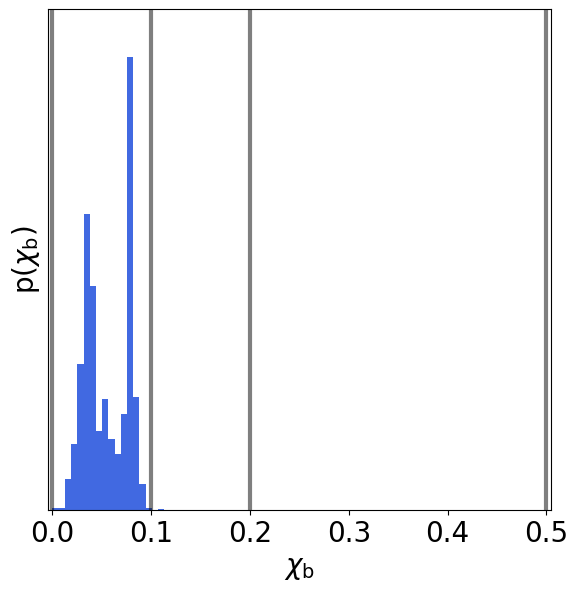

In [28]:
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(6.5,6.5))

chib_samps = all_samples[:,0]

plt.hist(chib_samps, density=True, label='flow', color='royalblue', bins=20)
for x in chi_b:
    plt.vlines(x, 0, 45, color='black', alpha=0.5, linewidth=3)
#plt.ylim(0,0.8)
plt.xlim(-0.005,.505)
plt.yticks([])
plt.autoscale(tight=True, axis='y')
plt.autoscale(tight=True, axis='y')
label = r'$\chi_{\mathrm{b}}$'
plt.xlabel(label)
plt.ylabel(f'p({label})')

Text(0, 0.5, 'p($\\alpha_{\\mathrm{CE}}$)')

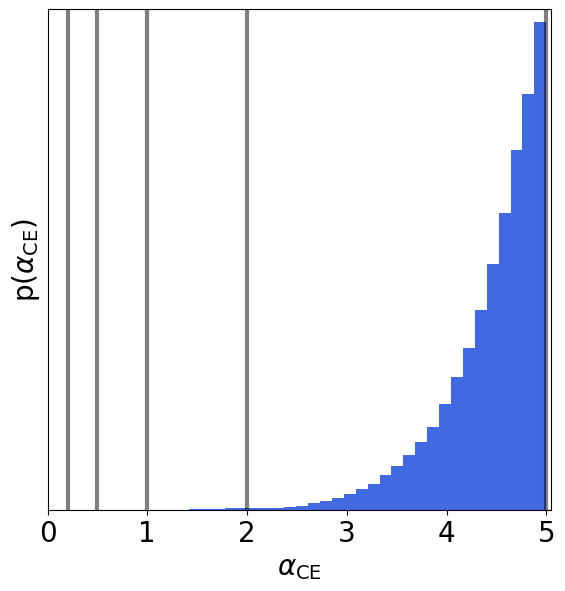

In [29]:
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(6.5,6.5))

alpha_samps = all_samples[:,1]

plt.hist(alpha_samps, density=True, label='flow', color='royalblue', bins=40)
for a in alpha:
    plt.vlines(a, 0, 1.5, color='black', alpha=0.5, linewidth=3)
#plt.ylim(0,0.8)
plt.xlim(0,5.05)
plt.yticks([])
plt.autoscale(tight=True, axis='y')
plt.autoscale(tight=True, axis='y')
label = '$\alpha_{\mathrm{CE}}$'
plt.xlabel(r'$\alpha_{\mathrm{CE}}$')
plt.ylabel(r'p($\alpha_{\mathrm{CE}}$)')

## Detectable Branching Fractions

In [4]:
#load flows
file_path='/data/wiay/2297403c/models_reduced.hdf5'
params = ['mchirp','q', 'chieff', 'z']
channels =['CE', 'CHE', 'GC', 'NSC', 'SMT']

model_names, flow = read_models.get_models(file_path, channels, params, use_flows=True, device='cpu',\
     no_bins=[5,4,4,5,4], sensitivity='midhighlatelow', use_unityweights=False)

100%|██████████| 5/5 [01:04<00:00, 12.93s/it]


In [6]:
alphas = np.zeros((all_samples.shape[0], len(channels)))
#get alpha for 5 channels given chi_b, alpha_CE in each sample
for i, samp in enumerate(tqdm(all_samples)):
    for cidx, chnl in enumerate(channels):
        smdl = flow[chnl]
        if chnl == 'CE':
            alphas[i, cidx] = smdl.get_alpha(samp[:2])
        else:
            alphas[i, cidx] = smdl.get_alpha([samp[:1][0], 1.])

  0%|          | 0/1024000 [00:00<?, ?it/s]/tmp/ipykernel_3493835/1142016588.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alphas[i, cidx] = smdl.get_alpha(samp[:2])
/tmp/ipykernel_3493835/1142016588.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alphas[i, cidx] = smdl.get_alpha([samp[:1][0], 1.])
100%|██████████| 1024000/1024000 [27:04<00:00, 630.53it/s]


NameError: name 'converted_betas' is not defined

In [7]:
converted_betas = (all_samples[:,2:] * alphas)
#divide by sum across channels
converted_betas /= converted_betas.sum(axis=1, keepdims=True)

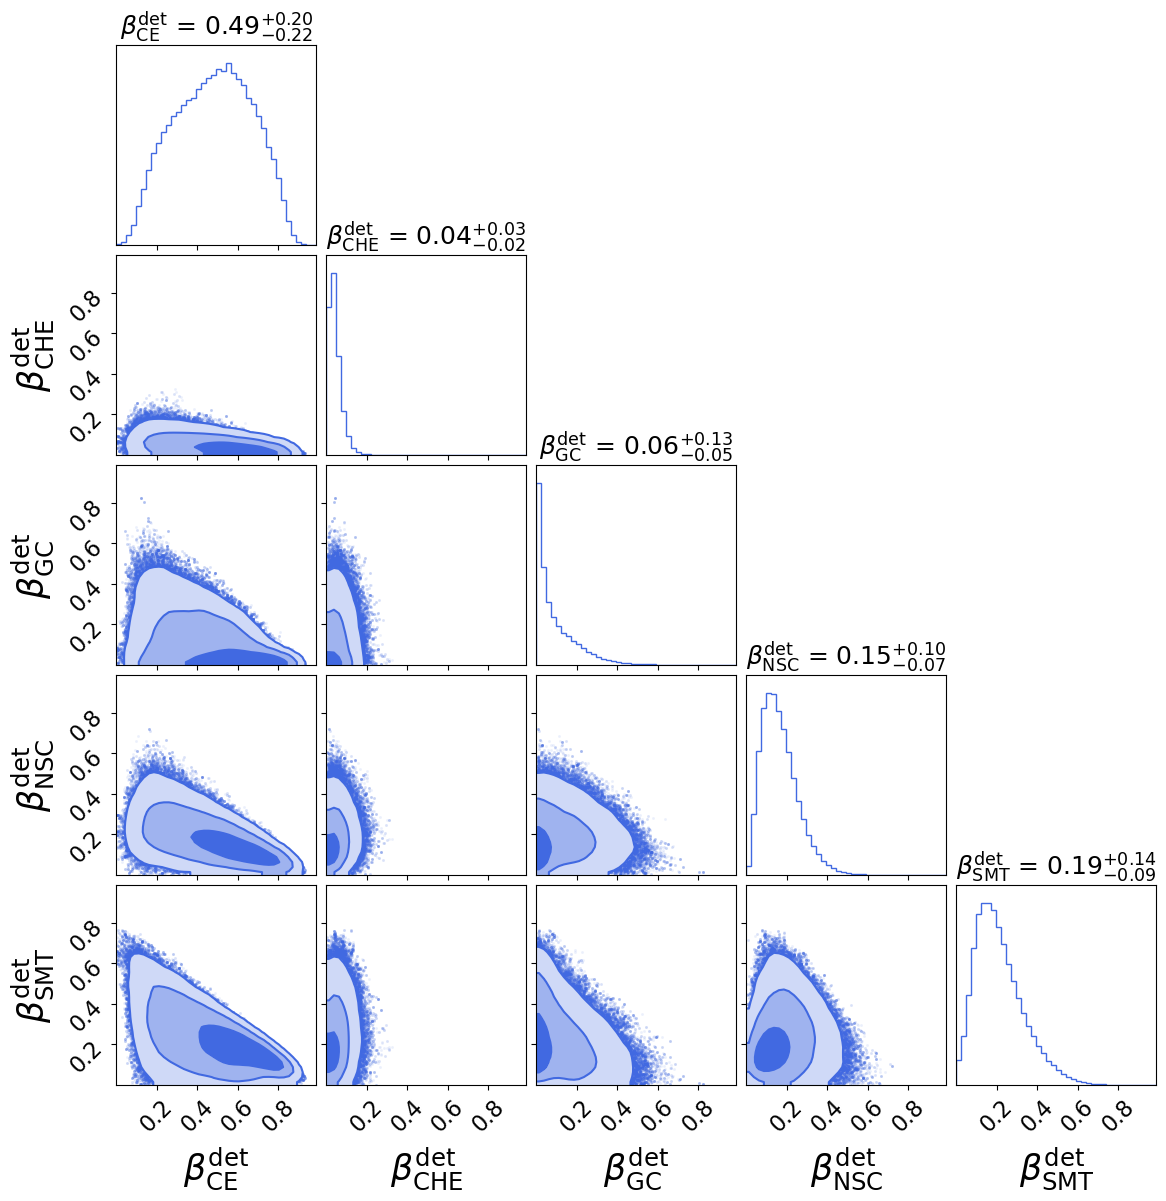

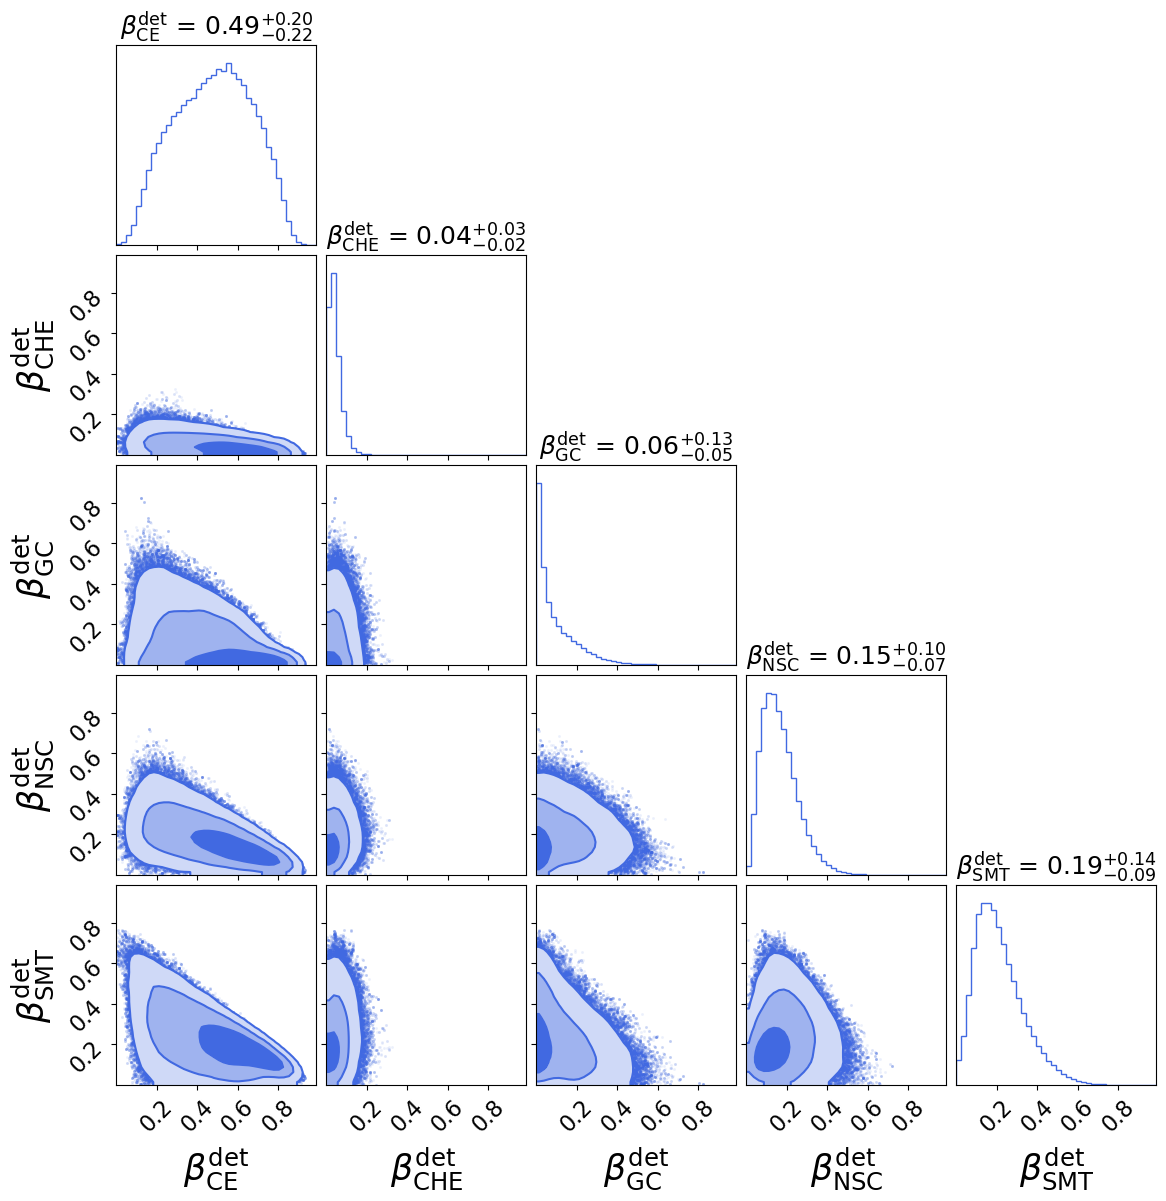

In [9]:
corner_kwargs_det = dict(
    bins=40,
    smooth=0.9,
    color="royalblue",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    label_kwargs=dict(fontsize=25),
    title_kwargs=dict(fontsize=18),
    labels=[r'$\beta_{\mathrm{CE}}^{\mathrm{det}}$',r'$\beta_{\mathrm{CHE}}^{\mathrm{det}}$',r'$\beta_{\mathrm{GC}}^{\mathrm{det}}$',r'$\beta_{\mathrm{NSC}}^{\mathrm{det}}$',r'$\beta_{\mathrm{SMT}}^{\mathrm{det}}$'],
    #labels=[r'$\alpha_CE$',r'$\Beta_CE$',r'$\Beta_CHE$',r'$\Beta_GC$',r'$\Beta_NSC$',r'$\Beta_SMT$'],
    range = [(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)
corner.corner(converted_betas, **corner_kwargs_det)